In [184]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from rhessys import utilities as rh

import ntpath
from hydro import objective_fxns as ob
from IPython.display import clear_output
import ipyparallel as p
import ProgressBar as pb
from pymail import alert

In [185]:
C = p.Client()

In [186]:
C.ids

[0, 1, 2, 3, 4, 5, 6, 7]

In [187]:
view = C.load_balanced_view()

In [188]:
calname = 'et_cal21'
#m = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_m.txt'%calname)
#ksat = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_ksat.txt'%calname)
#gsmax = np.loadtxt(prfx+'gsmax.txt')
#sd = np.loadtxt(prfx+'sd.txt')
rd = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_rd.txt'%calname)
#po = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_po.txt'%calname)
#pa = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_pa.txt'%calname)
lai = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_lai.txt'%calname)
#sd = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_sd.txt'%calname)

In [189]:
strt = 2004
nd = 2012

In [190]:
AFX = pd.read_pickle('../greenness_timing/data/AFX2_new.pcl')
AFX['wateryear'] = AFX.index.map(rh.wateryear)
AFX = AFX.loc[(AFX.wateryear>=strt) & (AFX.wateryear<=nd),:]
AFX2 = AFX.groupby(by='wateryear').sum()
#AFX2.reset_index(inplace=True)
#AFX3 = AFX.resample('D',how=np.sum)
AFX4 = AFX.resample('W',how=np.sum)
AFX5 = AFX.resample('M',how=np.sum)

In [191]:
%%px
import numpy as np
import pandas as pd
from rhessys import utilities as rh
strt = 2004
nd = 2012
AFX = pd.read_pickle('/Volumes/Users/Theo/projects/greenness_timing/data/AFX2_new.pcl')
AFX['wateryear'] = AFX.index.map(rh.wateryear)
AFX = AFX.loc[(AFX.wateryear>=strt) & (AFX.wateryear<=nd),:]
AFX2 = AFX.groupby(by='wateryear').sum()
AFX2.reset_index(inplace=True)
AFX3 = AFX.resample('D',how=np.sum)
AFX4 = AFX.resample('W',how=np.sum)
AFX5 = AFX.resample('M',how=np.sum)

In [192]:
files = glob.glob('/RHESSys/ComoCreek_new/out/%s/*_basin.daily'%calname)

In [193]:
cals = pd.DataFrame({'files':files})

In [194]:
cals.head()

,files
0,/RHESSys/ComoCreek_new/out/et_cal21/et_cal21_0...
1,/RHESSys/ComoCreek_new/out/et_cal21/et_cal21_1...
2,/RHESSys/ComoCreek_new/out/et_cal21/et_cal21_1...
3,/RHESSys/ComoCreek_new/out/et_cal21/et_cal21_1...
4,/RHESSys/ComoCreek_new/out/et_cal21/et_cal21_1...


In [125]:
rd.shape

(20000,)

In [195]:
cals.shape

(20000, 1)

In [215]:
num = 14900
fl = cals.loc[cals.idx==num,'files'].as_matrix()[0]

In [216]:
fl

'/RHESSys/ComoCreek_new/out/et_cal21/et_cal21_14900_basin.daily'

In [217]:
dat = rh.readRHESSysBasin(fl)
dat = dat.loc[(dat.wateryear>=strt) & (dat.wateryear<=nd),:] # crop by water year
dat2 = dat.groupby(by='wateryear').sum() # sum by water year
#dat2.reset_index(inplace=True)
dat4 = dat.resample('W',how=np.sum)
dat5 = dat.resample('M',how='sum')

dat['SW'] = dat.Kdown*1000./86400.
dat['LW'] = dat.Ldown*1000./86400.

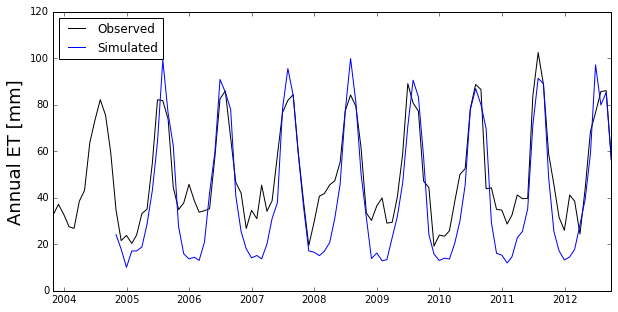

In [218]:
plt.figure(figsize=[10,5])
plt.plot(AFX5.index,AFX5.ET,'-k')
plt.plot(dat5.index,dat5.ET,'-b')
plt.ylabel('Annual ET [mm]',fontsize=18)
#plt.xlim(2003,2013)
#plt.ticklabel_format(useOffset=False)
plt.legend(['Observed','Simulated'],loc='best')
#plt.title('NR1: Simulation %s, Monthly NSE: %s, '%(num))
#plt.ylim(0,800)
#plt.savefig('/RHESSys/ComoCreek_new/figures/ET_cal_annual_bias1.png',dpi=300,bbox_inches='tight')

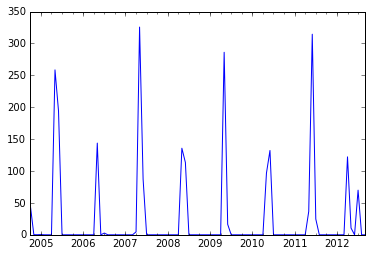

In [83]:
dat5.streamflow.plot()

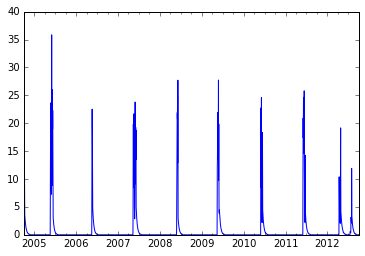

In [77]:
dat.streamflow.plot()

In [84]:
df2

,idx,lai,rd,Q,nse,nse_monthly,nse_weekly,pe,pe_monthly,pe_weekly,weekly_metric,monthly_metric
16108,16108,0.28,39.885,2422.809401,0.250664,0.62397,0.489444,0.581951,0.279536,0.326711,0.743089,0.810587


In [85]:
df.describe()

,idx,lai,rd,Q,nse,nse_monthly,nse_weekly,pe,pe_monthly,pe_weekly,weekly_metric,monthly_metric
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,0.850592,30.022343,457.707641,-5.681011,-10.015806,-8.577709,1.276906,0.781430,0.867799,-3.793193,-4.511810
std,5773.647028,0.376743,5.773201,844.777765,4.658646,8.527419,7.228732,0.429169,0.323373,0.346073,3.616070,4.265304
min,0.000000,0.200000,20.000000,0.000000,-14.432020,-26.242378,-22.282682,0.552306,0.278868,0.325319,-10.648416,-12.627690
25%,4999.750000,0.520000,25.024750,0.000000,-9.926345,-17.767417,-15.154057,0.893140,0.475028,0.544505,-7.082964,-8.389111
50%,9999.500000,0.850000,30.060500,0.000000,-5.093167,-8.796391,-7.573531,1.324182,0.800303,0.892826,-3.291230,-3.902197
75%,14999.250000,1.180000,34.969500,313.864675,-1.080469,-1.553820,-1.413236,1.668784,1.080395,1.187180,-0.209341,-0.279285
max,19999.000000,1.490000,39.997000,3239.703226,0.261829,0.623970,0.492480,1.930199,1.300126,1.414916,0.744613,0.810587


In [72]:
df2

,idx,ksat,lai,po,rd,Q,nse,nse_monthly,nse_weekly,pe,pe_monthly,pe_weekly,weekly_metric,monthly_metric
9576,9576,86.2,0.28,4.467,1.196,2458.802096,0.253562,0.626052,0.492123,0.579654,0.278821,0.326148,0.744431,0.811632


In [87]:
df3 = df.loc[df.monthly_metric>=0.70]

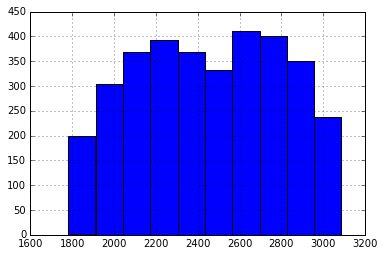

In [88]:
df3.Q.hist()

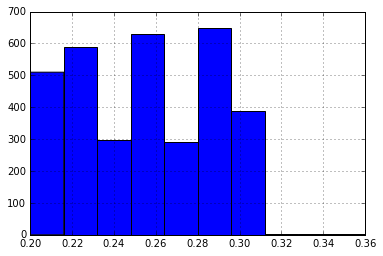

In [90]:
df3.lai.hist()

In [81]:
df3

,idx,ksat,lai,po,rd,Q,nse,nse_monthly,nse_weekly,pe,pe_monthly,pe_weekly,weekly_metric,monthly_metric
3,3,82.8,0.25,1.332,19.207,2466.048670,0.215828,0.585651,0.448644,0.587372,0.295678,0.337810,0.722633,0.791347
46,46,120.1,0.25,1.355,22.132,2425.680413,0.218540,0.586638,0.451112,0.587119,0.295091,0.337260,0.723869,0.791843
97,97,43.4,0.27,1.584,18.674,2274.250080,0.176539,0.554108,0.416623,0.608435,0.297781,0.345665,0.706583,0.775565
114,114,82.8,0.24,0.852,24.450,2579.122402,0.225269,0.585505,0.455324,0.578817,0.297720,0.335623,0.725984,0.791264
120,120,101.0,0.25,3.672,14.328,2548.154705,0.160102,0.538078,0.374808,0.597849,0.310233,0.352639,0.685641,0.767488
129,129,115.8,0.23,3.571,19.576,2681.874855,0.210657,0.562967,0.434477,0.573946,0.308625,0.340136,0.715538,0.779940
130,130,121.1,0.28,2.771,7.464,2226.729282,0.122025,0.516391,0.361793,0.625064,0.303636,0.356518,0.679114,0.756678
135,135,17.4,0.25,1.204,6.012,2518.769070,0.174627,0.554020,0.402340,0.594745,0.305273,0.347555,0.699432,0.775484
163,163,128.9,0.23,2.177,27.974,2670.141536,0.223775,0.571614,0.447237,0.573059,0.305730,0.337003,0.721934,0.784278
169,169,22.6,0.27,3.509,26.637,2278.007216,0.156803,0.542530,0.391844,0.612631,0.301696,0.350278,0.694170,0.769756


In [202]:
dat.columns

Index([u'basinID', u'pot_surface_infil', u'snow_thr', u'sat_def_z', u'sat_def',
       u'rz_storage', u'unsat_stor', u'rz_drainage', u'unsat_drain', u'cap',
       u'evap', u'snowpack', u'trans', u'baseflow', u'return', u'streamflow',
       u'psn', u'lai', u'gw.Qout', u'gw.storage', u'detention_store',
       u'%sat_area', u'litter_store', u'canopy_store', u'%snow_cover',
       u'snow_subl', u'trans_var', u'acc_trans', u'acctransv_var', u'pet',
       u'dC13', u'precip', u'pcp_assim', u'mortf', u'tmax', u'tmin', u'tavg',
       u'vpd', u'snowfall', u'recharge', u'gpsn', u'resp', u'gs', u'rootdepth',
       u'plantc', u'snowmelt', u'canopysubl', u'routedstreamflow',
       u'canopy_snow', u'height', u'evap_can', u'evap_lit', u'evap_soil',
       u'litrc', u'Kdown', u'Ldown', u'Kup', u'Lup', u'Kstar_can',
       u'Kstar_soil', u'Kstar_snow', u'Lstar_can', u'Lstar_soil',
       u'Lstar_snow', u'LE_canopy', u'LE_soil', u'LE_snow', u'Lstar_strat',
       u'canopydrip', u'ga', u'wateryear'

(14518, 14882)

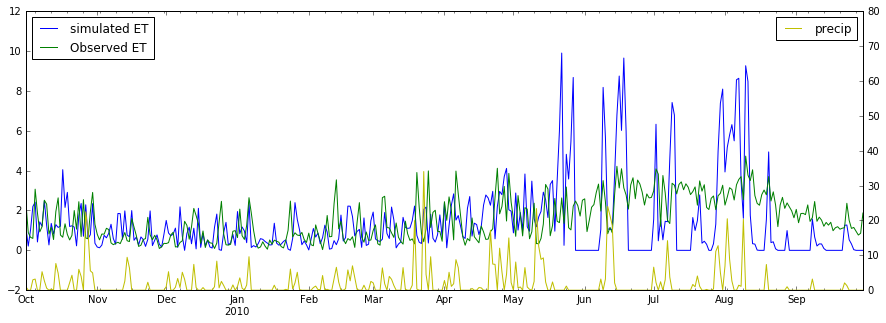

In [38]:
strt = '2009-10-01'
nd = '2010-09-30'
plt.figure(figsize=[15,5])
dat.ET.plot(label = 'simulated ET')
AFX.ET.plot(label = 'Observed ET')
#dat.tavg.plot()
#dat.tmin.plot()
#dat.tmax.plot()

plt.legend(loc='upper left')
ax1 = plt.gca()

ax2 = ax1.twinx()
plt.sca(ax2)
#dat.rz_storage.plot(c='m',ls='--')
dat.precip.plot(c='y',ls='-')
#dat.SW.plot(ls='--')
#dat.LW.plot(ls='--')
plt.legend()
plt.xlim(strt,nd)

(14518, 14882)

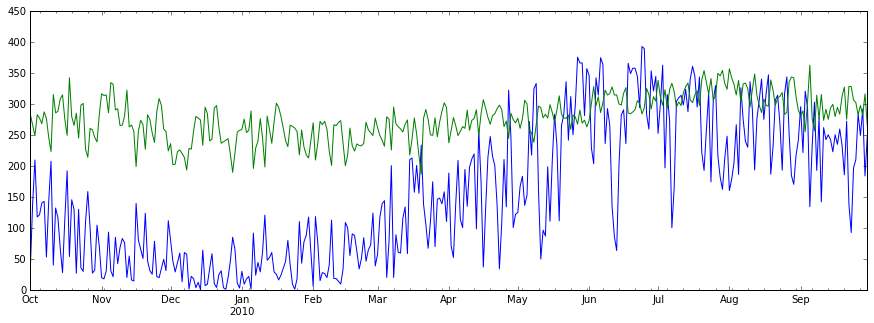

In [203]:
plt.figure(figsize=[15,5])
dat.SW.plot()
dat.LW.plot()
plt.xlim(strt,nd)

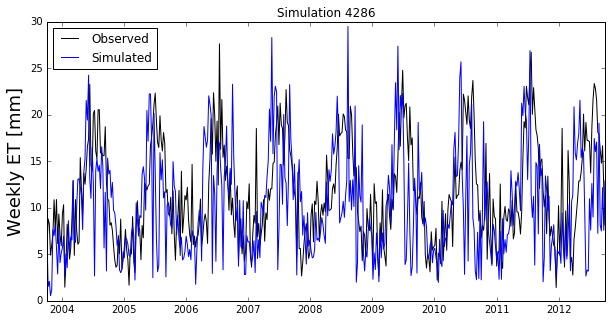

In [152]:
plt.figure(figsize=[10,5])
plt.plot(AFX4.index,AFX4.ET,'-k')
plt.plot(dat4.index,dat4.ET,'-b')
plt.ylabel('Weekly ET [mm]',fontsize=18)
#plt.xlim(2003,2013)
#plt.ticklabel_format(useOffset=False)
plt.legend(['Observed','Simulated'],loc='best')
plt.title('Simulation %s'%(num))

In [46]:
master = df.copy()

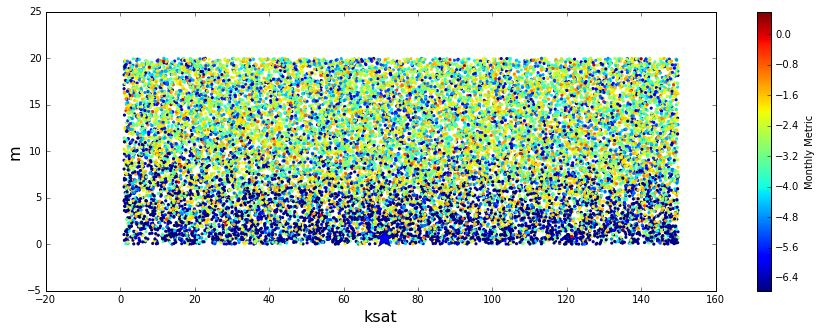

In [52]:
df = master.copy()
x = 'ksat'
y = 'm'

plt.figure(figsize=(15,5))
plt.scatter(df[x],df[y],s=10,c=df.monthly_metric,edgecolors='none')
plt.colorbar(label = 'Monthly Metric')
plt.xlabel(x, fontsize=16)
plt.ylabel(y, fontsize=16)
plt.plot(df2[x],df2[y],'*',markersize=20)

In [42]:
(np.sum(dat5.ET-AFX5.tot_ET)/np.sum(AFX5.tot_ET))*100

-4.2091804596942666

In [43]:
print 'm: ',m[num] 
print 'ksat: ',ksat[num] 
print 'gw1: ',gw1[num]
print 'Soil Depth',sd[num]

m:  15.703
ksat:  15.106
gw1:  0.449
Soil Depth 0.2013


In [ ]:
plt.figure(figsize=[15,5])
strt = '2011-10-01'
nd = '2013-09-30'
plt.plot(AFX[strt:nd].index,AFX[strt:nd].,'-k',lw=2)
plt.plot(dat[strt:nd].index,dat[strt:nd].ET,'-b',lw=2)

In [52]:
dat.columns

Index([u'basinID', u'pot_surface_infil', u'snow_thr', u'sat_def_z', u'sat_def',
       u'rz_storage', u'unsat_stor', u'rz_drainage', u'unsat_drain', u'cap',
       u'evap', u'snowpack', u'trans', u'baseflow', u'return', u'streamflow',
       u'psn', u'lai', u'gw.Qout', u'gw.storage', u'detention_store',
       u'%sat_area', u'litter_store', u'canopy_store', u'%snow_cover',
       u'snow_subl', u'trans_var', u'acc_trans', u'acctransv_var', u'pet',
       u'dC13', u'precip', u'pcp_assim', u'mortf', u'tmax', u'tmin', u'tavg',
       u'vpd', u'snowfall', u'recharge', u'gpsn', u'resp', u'gs', u'rootdepth',
       u'plantc', u'snowmelt', u'canopysubl', u'routedstreamflow',
       u'canopy_snow', u'height', u'evap_can', u'evap_lit', u'evap_soil',
       u'litrc', u'Kdown', u'Ldown', u'Kup', u'Lup', u'Kstar_can',
       u'Kstar_soil', u'Kstar_snow', u'Lstar_can', u'Lstar_soil',
       u'Lstar_snow', u'LE_canopy', u'LE_soil', u'LE_snow', u'Lstar_strat',
       u'canopydrip', u'ga', u'wateryear'

In [196]:
import hydro.objective_fxns as ofx

In [197]:
%px import hydro.objective_fxns as ofx

In [198]:
def calc_obfx(fl,idx):
    dat = rh.readRHESSysBasin(fl)
    dat = dat.loc[(dat.wateryear>=strt) & (dat.wateryear<=nd),:] # crop by water year
    
    dat4 = dat.resample('W', how= np.sum)
    dat5 = dat.resample('M', how= np.sum)
    
    nse = ofx.nashsut(AFX.ET,dat.ET) # daily NSE
    nse2 = ofx.nashsut(AFX4.ET,dat4.ET) # weekly NSE
    nse3 = ofx.nashsut(AFX5.ET,dat5.ET) # monthly NSE
    
    pe = ofx.percenterror (AFX.ET,dat.ET) # daily NSE
    pe2 = ofx.percenterror(AFX4.ET,dat4.ET) # weekly NSE
    pe3 = ofx.percenterror(AFX5.ET,dat5.ET) # monthly NSE
    
    stream = dat.streamflow.sum()/len(dat)
    
    return idx,nse,pe,nse2,pe2,nse3,pe3,stream # compute the objective function

In [199]:
def get_id(fl):
    pth,base=ntpath.split(fl) # split out the indexer
    return int(base.split('_')[2])

In [200]:
cals['idx']=cals.files.map(get_id) # extract the simulation ID

In [201]:
res = view.map(calc_obfx,cals.files,cals.idx)

In [202]:
p = pb.ProgressBar(len(cals))

In [203]:
import time

In [204]:
while res.ready() == False:
    p.animate_ipython(res.progress)
    time.sleep(2)

alert.send_alert('barnhatb@colorado.edu','Processing %s has finished'%calname,'Your script has finished')

[****************100%******************]  19975 of 20000 complete


In [205]:
res.ready()

True

In [206]:
idx,nse,pe,nse2,pe2,nse3,pe3,Q = zip(*res.result)

In [207]:
len(cals)

20000

In [208]:
tmp1 = pd.DataFrame({'rd':rd,'lai':lai,'idx':np.arange(0,len(cals))})
tmp2 = pd.DataFrame({'idx':idx,'nse':nse,'pe':pe,'nse_weekly':nse2,'pe_weekly':pe2,'nse_monthly':nse3,'pe_monthly':pe3,'Q':Q})

df = pd.merge(left=tmp1,right=tmp2,on='idx')

In [209]:
def metric_weekly(df):
    bias = 1.-(df.pe_weekly/100.)
    nse = df.nse_weekly

    
    return np.nanmean([bias,nse])

In [210]:
def metric_monthly(df):
    bias = 1.-(df.pe_monthly/100.)
    nse = df.nse_monthly

    
    return np.nanmean([bias,nse])

In [211]:
df['weekly_metric'] = df.apply(metric_weekly,axis=1)
df['monthly_metric'] = df.apply(metric_monthly,axis=1)

In [212]:
df2 = df.loc[df.monthly_metric==df.monthly_metric.max()]

In [213]:
len(df2)

1

In [214]:
df2

,idx,lai,rd,Q,nse,nse_monthly,nse_weekly,pe,pe_monthly,pe_weekly,weekly_metric,monthly_metric
14900,14900,0.24,7.551,0.873578,0.218467,0.583517,0.439833,0.579323,0.29657,0.337273,0.71823,0.790275


In [177]:
df2.iloc[np.random.randint(0,len(df2),1)]

,idx,lai,rd,Q,nse,nse_monthly,nse_weekly,pe,pe_monthly,pe_weekly,weekly_metric,monthly_metric
7654,7654,0.28,5.438,0.829347,0.250722,0.623924,0.489392,0.581921,0.27954,0.326717,0.743062,0.810564


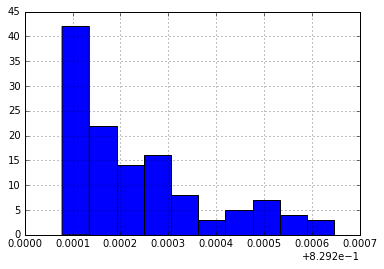

In [178]:
df2.Q.hist()

In [33]:
df.loc[df.nse_monthly.idxmax()]

idx               17757.000000
ksat                 77.100000
po                    0.637000
rd                    2.102000
nse                  -1.099489
nse_monthly          -1.672934
nse_weekly           -1.520237
pe                    0.840666
pe_monthly            0.466500
pe_weekly             0.518732
weekly_metric        -0.262712
monthly_metric       -0.338799
Name: 17757, dtype: float64

In [31]:
df2

,idx,ksat,m,pa,po,rd,nse,nse_monthly,nse_weekly,pe,pe_monthly,pe_weekly,weekly_metric,monthly_metric
14424,14424,70.9,0.7,0.009,1.899,7.554,-1.864746,0.194985,-1.137795,0.989368,0.287243,0.506411,-0.071429,0.596056


In [219]:
df.to_pickle('./data/%s.pcl'%calname)

In [44]:
df.iloc[df.pe_weekly.idxmin()]

idx               3792.000000
ksat                34.600000
m                    0.216000
pa                   0.002000
po                   1.684000
rd                  10.492000
nse                 -1.650137
nse_monthly          0.006524
nse_weekly          -0.404734
pe                   0.961452
pe_monthly           0.285031
pe_weekly            0.416865
weekly_metric        0.295549
monthly_metric       0.501837
Name: 3792, dtype: float64

In [55]:
res.progress

435

In [175]:
print res.progress,'Completed'
print res.elapsed/60./60.,'Hours Elapsed'

49954 Completed
4.107186105 Hours Elapsed


In [54]:
res.elapsed/60./60.

13.622163169444443

## Alter below for the weekly NSE

In [176]:
#idx,bias,nse = zip(*res.result)
idx,nse2 = zip(*res.result)

In [177]:
#tmp = pd.DataFrame({'idx':idx,'bias':bias,'nse':nse})
tmp = pd.DataFrame({'idx':idx,'nse_week':nse2})

In [178]:
cals = pd.merge(cals,tmp,on='idx')

In [66]:
cals['abs_bias'] = np.abs(cals.bias)

In [129]:
x = cals.abs_bias.argmin()

In [130]:
num = cals.ix[x,'idx'] # get the simulation number

In [131]:
cals.loc[cals.idx==num]

,index,files,idx,bias,nse,abs_bias,m,ksat,gsmax,rd,sd
27886,19871,/RHESSys/como_test/out/cal/et/et_cal1_27886_ba...,27886,0.487683,0.201628,0.487683,11.5363,70.9116,0.0021,1,12.606


In [126]:
x = cals.nse.argmax()

In [127]:
num = cals.ix[x,'idx'] # get the simulation number

In [128]:
cals.loc[cals.idx==num]

,index,files,idx,bias,nse,abs_bias,m,ksat,gsmax,rd,sd
5687,45160,/RHESSys/como_test/out/cal/et/et_cal1_5687_bas...,5687,-6.46982,0.237461,6.46982,12.7739,110.9317,0.0018,1.09,8.759


In [9]:
#x = cals.nse_week.argmax()
num = cals.ix[cals3075,'idx'] # get the simulation number

In [180]:
cals.loc[cals.idx==num]

,index,files,idx,bias,nse,abs_bias,m,ksat,gsmax,rd,sd,nse_week
12769,3075,/RHESSys/como_test/out/cal/et/et_cal1_12769_ba...,12769,-6.219563,0.235892,6.219563,6.1985,197.1748,0.0018,1.01,5.302,0.694955


In [11]:
cals.sort('idx', inplace=True)
cals.reset_index(inplace=True)

In [12]:
cals.head()

,index,files,idx
0,0,/RHESSys/como_test/out/cal/et/et_cal1_0_basin....,0
1,11111,/RHESSys/como_test/out/cal/et/et_cal1_1_basin....,1
2,22222,/RHESSys/como_test/out/cal/et/et_cal1_2_basin....,2
3,33333,/RHESSys/como_test/out/cal/et/et_cal1_3_basin....,3
4,44398,/RHESSys/como_test/out/cal/et/et_cal1_4_basin....,4


In [124]:
cals['m'] = m
cals['ksat'] = ksat
cals['gsmax'] = gsmax
cals['rd'] = rd
cals['sd'] = sd

In [125]:
cals.head()

,index,files,idx,bias,nse,abs_bias,m,ksat,gsmax,rd,sd
0,0,/RHESSys/como_test/out/cal/et/et_cal1_0_basin....,0,42.720198,-3.702056,42.720198,16.9055,24.3690,0.0067,3.79,12.778
1,11111,/RHESSys/como_test/out/cal/et/et_cal1_1_basin....,1,43.354336,-3.686307,43.354336,27.3120,153.2445,0.0069,4.62,6.454
2,22222,/RHESSys/como_test/out/cal/et/et_cal1_2_basin....,2,22.629809,-1.604084,22.629809,23.9581,166.2149,0.0046,1.00,9.323
3,33333,/RHESSys/como_test/out/cal/et/et_cal1_3_basin....,3,-8.776130,0.231875,8.776130,12.5334,110.6989,0.0017,2.63,12.631
4,44398,/RHESSys/como_test/out/cal/et/et_cal1_4_basin....,4,42.183816,-3.345861,42.183816,21.9625,39.0020,0.0062,3.60,4.603


In [132]:
cals.to_pickle('/RHESSys/como_test/et1_cal_bias.pcl') # save the results

In [4]:
cals = pd.read_pickle('/RHESSys/como_test/et1_cal_bias.pcl')